In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('delivery_time.csv')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


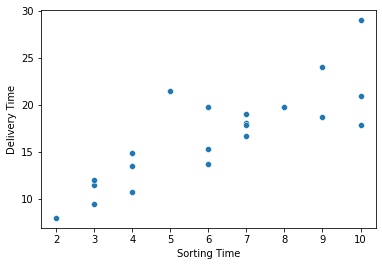

In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


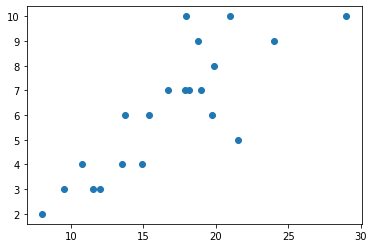

In [35]:
X = data[['Delivery Time']]
y = data[['Sorting Time']]
plt.scatter(X,y)
plt.show()

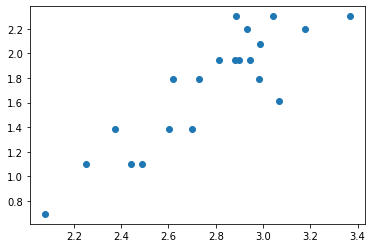

In [60]:
X_log = np.log(X)
y_log = np.log(y)

#plt_1 = plt.figure(figsize=(5,5))
plt.scatter(X_log,y_log,label='log')


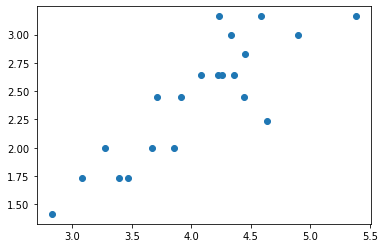

In [61]:
X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

#plt2 = plt.figure(figsize=(5,5))
plt.scatter(X_sqrt,y_sqrt)

In [62]:
from sklearn.model_selection import train_test_split

#for linear model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

#for logarithimic model
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state = 42, test_size = 0.1)


#for squared root model
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, random_state = 42, test_size = 0.1)


In [76]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm_log = LinearRegression()

lm_sqrt = LinearRegression()

#linear
lm.fit(X_train, y_train)

#logarithmic
lm_log.fit(X_train_log, y_train_log)

#square root
lm_sqrt.fit(X_train_sqrt, y_train_sqrt)


LinearRegression()

In [79]:
#linear
y_pred = lm.predict(X_test)

#log
y_pred_log = lm_log.predict(X_test_log)

#sqrt
y_pred_sqrt = lm_sqrt.predict(X_test_sqrt)

In [29]:
pd.DataFrame({'Y Test':y_test.values.reshape(-1), 'Y Predicted':y_pred.reshape(-1)})

,Y Test,Y Predicted
0,10,7.773206
1,7,6.647580
2,4,5.389528


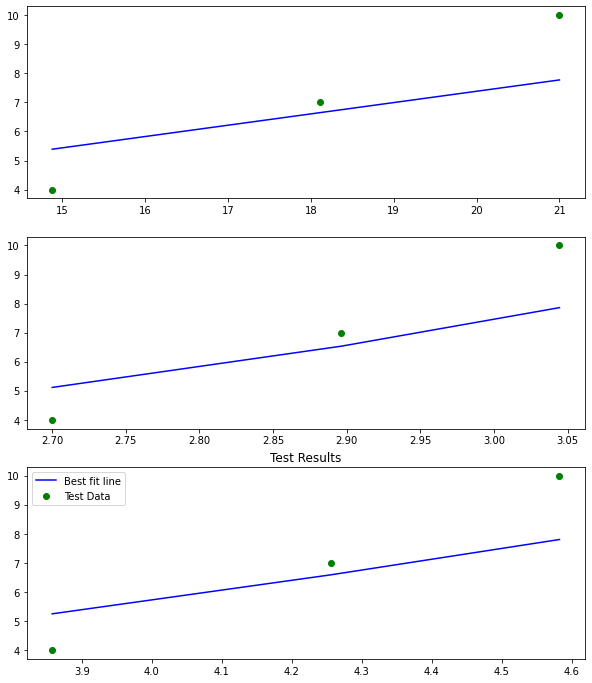

In [80]:
fig = plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
plt.plot(X_test, y_pred, color='b', label='Best fit line')
plt.scatter(X_test, y_test, color='g', label='Test Data')

plt.subplot(3,1,2)
plt.plot(X_test_log, np.exp(y_pred_log), color='b', label='Best fit line')
plt.scatter(X_test_log, np.exp(y_test_log), color='g', label='Test Data')

plt.subplot(3,1,3)
plt.plot(X_test_sqrt, (y_pred_sqrt)**2, color='b', label='Best fit line')
plt.scatter(X_test_sqrt, (y_test_sqrt)**2, color='g', label='Test Data')

plt.title('Test Results')
plt.legend()
plt.show()

In [74]:
j = np.log(10)
np.exp(j)

10.000000000000002

In [83]:
from sklearn.metrics import mean_squared_error

# Calculate and print Root Mean Square Error(RMSE)
#linear
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#log
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse)

#sqrt
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
rmse_sqrt = np.sqrt(mse)


print('RMSE value:',rmse)
print('Log RMSE value:',rmse_log)
print('Sqrt RMSE value:',rmse_sqrt)

RMSE value: 1.5290079821004714
Log RMSE value: 1.5290079821004714
Sqrt RMSE value: 1.5290079821004714
